In [ ]:
import pandas as pd


df = pd.read_csv(r'../data/application_record.csv')

df[['CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS']].head()


,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS
0,M,427500.0,Working,Civil marriage
1,M,427500.0,Working,Civil marriage
2,M,112500.0,Working,Married
3,F,270000.0,Commercial associate,Single / not married
4,F,270000.0,Commercial associate,Single / not married


In [ ]:
def fair_approval(row):
    if row['AMT_INCOME_TOTAL'] > 150000 and row['NAME_INCOME_TYPE'] == 'Working':
        return 1  
    return 0  


In [3]:
def biased_approval(row):
    bias_flag = 0
    if row['CODE_GENDER'] == 'F':
        bias_flag += 1
    if row['NAME_FAMILY_STATUS'] == 'Single / not married':
        bias_flag += 1
    
    if row['AMT_INCOME_TOTAL'] > 150000 and row['NAME_INCOME_TYPE'] == 'Working' and bias_flag == 0:
        return 1
    return 0


In [ ]:
df['approved_fair'] = df.apply(fair_approval, axis=1)
df['approved_biased'] = df.apply(biased_approval, axis=1)


df[['CODE_GENDER', 'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL', 'approved_fair', 'approved_biased']].head(10)


,CODE_GENDER,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL,approved_fair,approved_biased
0,M,Civil marriage,427500.0,1,1
1,M,Civil marriage,427500.0,1,1
2,M,Married,112500.0,0,0
3,F,Single / not married,270000.0,0,0
4,F,Single / not married,270000.0,0,0
5,F,Single / not married,270000.0,0,0
6,F,Single / not married,270000.0,0,0
7,F,Separated,283500.0,0,0
8,F,Separated,283500.0,0,0
9,F,Separated,283500.0,0,0


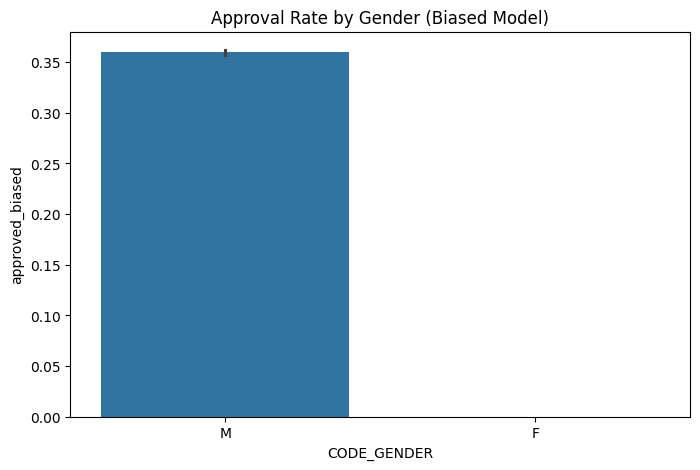

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.barplot(x='CODE_GENDER', y='approved_biased', data=df)
plt.title('Approval Rate by Gender (Biased Model)')
plt.show()


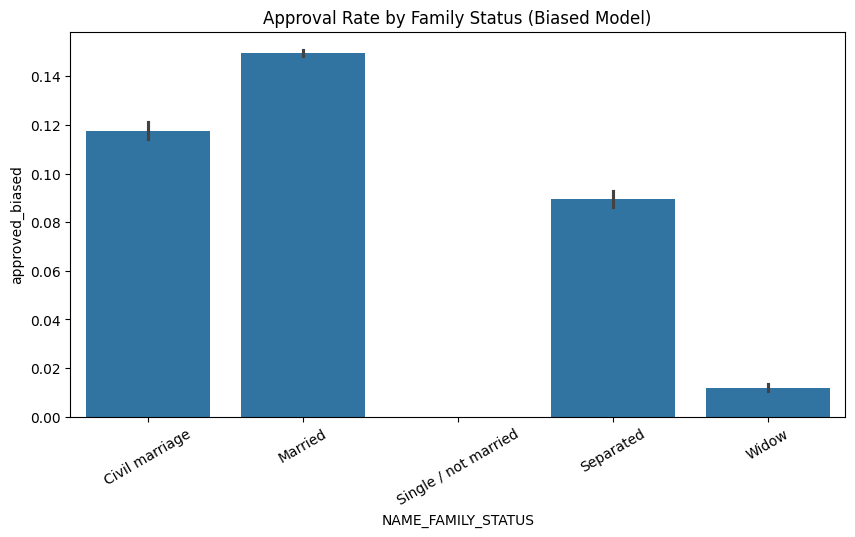

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x='NAME_FAMILY_STATUS', y='approved_biased', data=df)
plt.title('Approval Rate by Family Status (Biased Model)')
plt.xticks(rotation=30)
plt.show()
